# POL280 Bayesian Modeling Homework 4

### Gento Kato (June 15, 2017)

---

*The 2016 American National Election Study (ANES) data and codebook are stored in the Dropbox folder (<code>ANES2016.dta</code>). The variable <code>presvote</code> is coded so that 0 = Clinton and 1 = Trump, and other variables are coded so that higher values correspond to more conservative attitudes.*

---

### 1. Perform Bayesian model averaging on a regression model of your choice. Present the results (preferably in graphical format).

**Load Packages and Data**

In [181]:
## Load Packages
library(rjags); library(mcmcplots); library(coefplot); library(ggplot2)
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/imageplot.bma2")
library(MCMCpack); library(BMA);library(mlogitBMA); library(mlogit)

In [182]:
## Load Data
library(foreign)
anes16 = read.dta("../data/POL280/ANES2016.dta")

**Describe Dependent Variable**

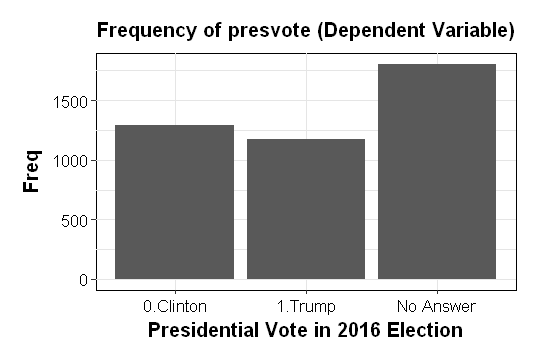

In [183]:
anes16$presvote[is.na(anes16$presvote)] <- 3 
anes16$presvote[anes16$presvote==1] <- 2
anes16$presvote[anes16$presvote==0] <- 1
options(repr.plot.width=4.5, repr.plot.height=3, warn=-1)
dvtab <- as.data.frame(table(as.character(anes16$presvote))) 
dvtab$Var1 <- as.character(dvtab$Var1)
dvtab$Var1[1] <- "0.Clinton"; dvtab$Var1[2] <- "1.Trump"; dvtab$Var1[3] <- "No Answer"
ggplot(data=dvtab, aes(Var1, Freq)) + gktheme + geom_bar(stat = "identity") +
ggtitle("Frequency of presvote (Dependent Variable)") + xlab("Presidential Vote in 2016 Election")

**Bayesian Model Averaging on Multinomial-Logit Model** 

Given that the outcome variable is tri-chotomous, I conduct BMA of multinomial logit model, as follows:

In [184]:
formula.mlogit <- formula(presvote ~ genderresent1 + genderresent2 + genderresent3 + genderresent4 + 
                          female + partyid + libcon + spendserv + defensespend + healthinsurance + guarjobs + 
                          mexicowall + aidblacks + environmentjobs + affirmativeaction + troopsisis + syrianrefugees + 
                          climatechangeaction + transgenderbathrooms + abortion + thermometerpopefrancis + 
                          thermometerevangelicals + thermometerblacklivesmatter)

In [185]:
mlogitBMAres <- bic.mlogit(formula.mlogit, data=na.omit(anes16), choices = 1:3, 
                           base.choice = 1, include.intercepts = TRUE, verbose=TRUE, OR=10000)


Begg & Gray approximation started.
 24 variables considered.
 1463 models initially selected.
Final number of models: 63 


**Plotting Model Selection Result**

Models as clumns and variables as rows. The black cell implies that the variable is selected into the corresponding model, and white cell implies that the variable is not selected into the corresponding model. Width of columns (models) are weighted by the probability of model given the data.

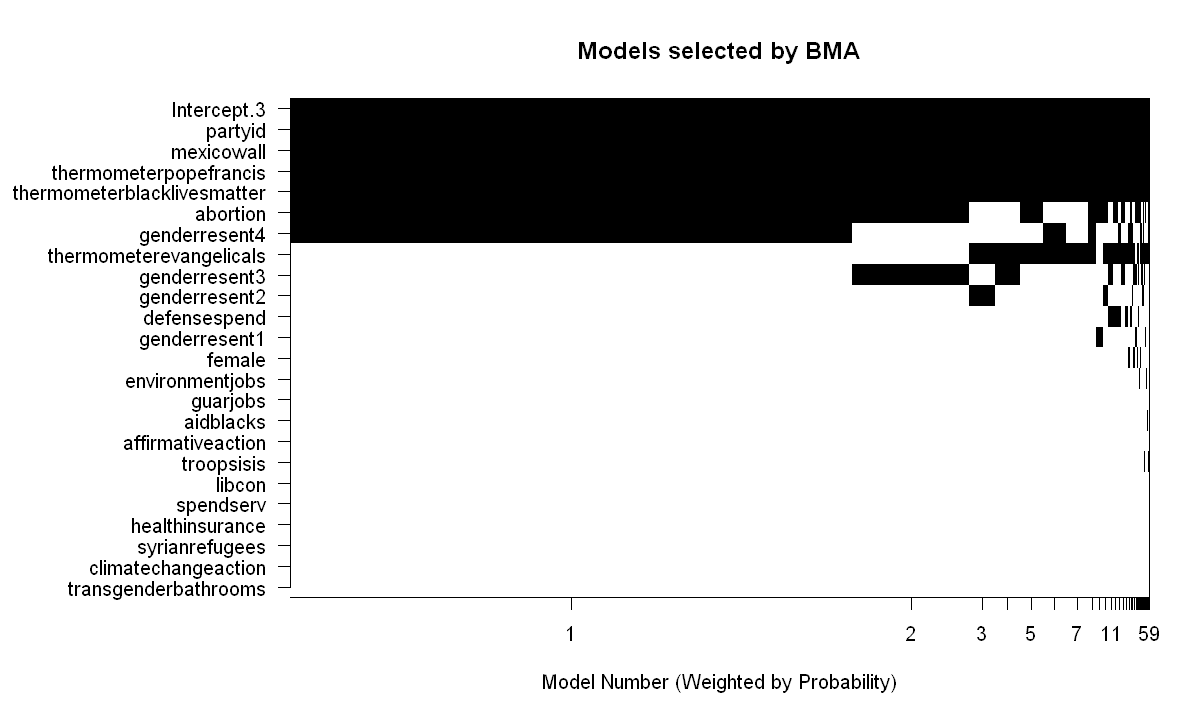

In [188]:
options(repr.plot.width=10, repr.plot.height=6, warn=-1)
imageplot.bma2(mlogitBMAres$bic.glm, color="blackandwhite", order= "probne0", mar.set = c(5,12,4,2)) #c("brown2","cyan3","beige")

### 2. Which variables most and least consistently contribute predictive value in explaining your response variable?

Looking at the image plot, following variables almost always contribute to the prediction (selected into models with high-probability) :

* <code>Intercept.3</code> (intercept for third category: no answer)
* <code>partyid</code> 
* <code>mexicowall</code> 
* <code>thermometerpopefrancis</code>
* <code>thermometerblacklivesmatter</code>

The above variables should *always* be included in the model.

Following variables contribute to the model sometimes:

* <code>abortion</code>
* <code>genderresent4</code>
* <code>thermometerevangelicals</code>
* <code>genderresent3</code>

Interestingly, the above four variables are never included in the same model all together (at least for well-performed models). Inclusion of all those variables together in the same model may not be a good strategy to go with.  

All other variables are almost never included in the well-performed model, so contribute *the least* to predictions. 